## Algorithm Analysis

* An **algorithm** is a generic, step-by-step list of instructions for solving a problem. It is a method for solving any instance of the problem such that given a particular input, the algorithm produces the desired result.

* A **program**, on the other hand, is an algorithm that has been encoded into some programming language. There may be many programs for the same algorithm, depending on the programmer and the programming language being used.

* **Algorithm analysis** is concerned with comparing algorithms based upon the amount of **computing resources** that each algorithm uses. We want to be able to consider two algorithms and say that one is better than the other because it is more efficient in its use of those resources or perhaps because it simply uses fewer.

* There are two different ways to look at resources. One way is to consider **the amount of space or memory** an algorithm requires to solve the problem. The amount of space required by a problem solution is typically dictated by the problem instance itself. Every so often, however, there are algorithms that have very specific space requirements.

* As an alternative to space requirements, we can analyze and compare algorithms based on **the amount of time** they require to execute. One way we can measure the execution time for a function is to do a **benchmark analysis**. This means that we will track the actual time required for the program to compute its result.

In [1]:
def sumOfN(n):
    theSum = 0
    for i in range(n):
        theSum += i
    return theSum

In the function <code>sumOfN</code>, the number of assignment statements is 1 (<code>theSum = 0</code>) plus the value of $n$ (the number of times we perform <code>theSum =+ i</code>). We can denote this by a function, call it $T$, where $T(n)=1+n$. The parameter $n$ is often referred to as **the size of the problem**, and we can read this as "$T(n)$ is the time it takes to solve a problem of size $n$, namely $1+n$ steps."

**The order of magnitude** function describes the part of $T(n)$ that increases the fastest as the value of $n$ increases. Order of magnitude is often called **Big-O notation** and written as $O(f(n))$. It provides a useful approximation to the actual number of steps in the computation. The function $f(n)$ provides a simple representation of the dominant part of the original $T(n)$.

## Time Complexity

https://en.wikipedia.org/wiki/Time_complexity

### linear scale

In [2]:
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt

# draw figure in notebook, note: you can not add any comment after the following line.
%matplotlib inline


x = np.linspace(0.000001, 4.0, 100)

logarithmic = np.log(x)
fractional_power = np.power(x, 0.5)
linear = x
quasilinear = x * np.log(x)
quadratic = np.power(x, 2)
exponential = np.exp(x)
factorial = scipy.special.factorial(x)

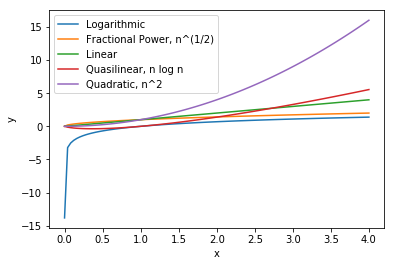

In [3]:
plt.plot(x, logarithmic, label='Logarithmic')
plt.plot(x, fractional_power, label='Fractional Power, n^(1/2)')
plt.plot(x, linear, label='Linear')
plt.plot(x, quasilinear, label='Quasilinear, n log n')
plt.plot(x, quadratic, label='Quadratic, n^2')
#plt.plot(x, exponential, label='Exponential, e^n')
#plt.plot(x, factorial, label='Factorial, e^n')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### log scale

In [4]:
n = np.linspace(1.0, 20.0, 100)

logarithmic = np.log(n)
fractional_power = np.power(n, 0.5)
linear = n
quasilinear = x * np.log(n)
quadratic = np.power(n, 2)
exponential = np.exp(n)
factorial = scipy.special.factorial(n)

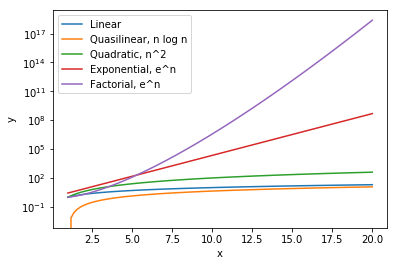

In [5]:
#plt.plot(x, logarithmic, label='Logarithmic')
#plt.plot(n, fractional_power, label='Fractional Power, n^(1/2)')
plt.plot(n, linear, label='Linear')
plt.plot(n, quasilinear, label='Quasilinear, n log n')
plt.plot(n, quadratic, label='Quadratic, n^2')
plt.plot(n, exponential, label='Exponential, e^n')
plt.plot(n, factorial, label='Factorial, e^n')

plt.yscale('log') # try close it
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### Profiling

### Linear

In [6]:
import time

problemSize = 1000000
print("%12s %16s %12s" % ("Problem Size", "Seconds", "Iteration"))

x_li = list()
y_li = list()

for epoch in range(5):
    
    start = time.time()
    
    #########################
    work = 0
    for x in range(problemSize):
        work += 1
        work -= 1
    #########################
    
    end = time.time()
    elasped = end - start
    
    print("%12d %16.3f" % (problemSize, elasped))
    x_li.append(problemSize)
    y_li.append(elasped)
    
    problemSize *= 2

Problem Size          Seconds    Iteration
     1000000            0.237
     2000000            0.508
     4000000            0.847
     8000000            1.678
    16000000            4.082


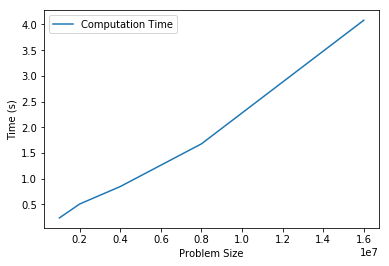

In [7]:
plt.plot(x_li, y_li, label='Computation Time')

plt.legend()
plt.xlabel('Problem Size')
plt.ylabel('Time (s)')

plt.show()

### Double loop

In [8]:
import time

problemSize = 250
print("%12s %16s %12s" % ("Problem Size", "Seconds", "Iterations"))

x_li = list()
y_li = list()

for epoch in range(5):

    start = time.time()
    
    #########################
    iterations = 0
    
    work = 0
    for x in range(problemSize):
        for y in range(problemSize):
            work += 1
            work -= 1
            
            iterations += 1
    #########################
    
    end = time.time()
    elasped = end - start
    
    print("%12d %16.3f %12d" % (problemSize, elasped, iterations))
    x_li.append(problemSize)
    y_li.append(elasped)
    
    problemSize *= 2

Problem Size          Seconds   Iterations
         250            0.020        62500
         500            0.082       250000
        1000            0.362      1000000
        2000            1.338      4000000
        4000            5.847     16000000


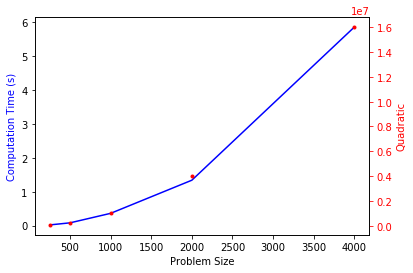

In [9]:
fig, ax1 = plt.subplots()
ax1.plot(x_li, y_li, 'b-', label='Computation Time')
ax1.set_xlabel('Problem Size')
ax1.set_ylabel('Computation Time (s)', color='b')
ax1.tick_params('s', colors='b')

ax2 = ax1.twinx()
ax2.plot(x_li, np.array(x_li)*np.array(x_li), 'r.', label='Quadratic, n^2')
ax2.set_ylabel('Quadratic', color='r')
ax2.tick_params('y', colors='r')

plt.show()

### Tripple loop

In [10]:
import time

problemSize = 20
print("%12s %16s %12s" % ("Problem Size", "Seconds", "Iterations"))

x_li = list()
y_li = list()

for epoch in range(5):

    start = time.time()
    
    #########################
    iterations = 0
    
    work = 0
    for x in range(problemSize):
        for y in range(problemSize):
            for z in range(problemSize):
                work += 1
                work -= 1
            
                iterations += 1
    #########################
    
    end = time.time()
    elasped = end - start
    
    print("%12d %16.3f %12d" % (problemSize, elasped, iterations))
    x_li.append(problemSize)
    y_li.append(elasped)
    
    problemSize *= 2

Problem Size          Seconds   Iterations
          20            0.002         8000
          40            0.017        64000
          80            0.147       512000
         160            1.363      4096000
         320           11.610     32768000


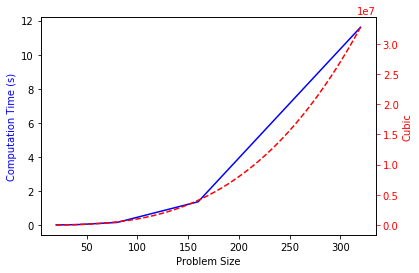

In [11]:
fig, ax1 = plt.subplots()
ax1.plot(x_li, y_li, 'b-', label='Computation Time')
ax1.set_xlabel('Problem Size')
ax1.set_ylabel('Computation Time (s)', color='b')
ax1.tick_params('s', colors='b')

ax2 = ax1.twinx()
x = np.linspace(20.0, problemSize/2.0, 100) # hack
ax2.plot(x, np.array(x)*np.array(x)*np.array(x), 'r--', label='Cubic, n^3')
ax2.set_ylabel('Cubic', color='r')
ax2.tick_params('y', colors='r')

plt.show()

### Big O

In [12]:
import time

initProblemSize = 400
problemSize = initProblemSize
print("%12s %16s %12s" % ("Problem Size", "Seconds", "Works"))

x_li = list()
y_li = list()

for epoch in range(5):

    start = time.time()
    
    #########################
    work = 0
    for x in range(problemSize):
        work += 1
        for y in range(problemSize):
            work += 1
    #########################
    
    end = time.time()
    elasped = end - start
    
    print("%12d %16.3f %12d" % (problemSize, elasped, work))
    x_li.append(problemSize)
    y_li.append(elasped)
    
    problemSize *= 2

Problem Size          Seconds        Works
         400            0.021       160400
         800            0.105       640800
        1600            0.474      2561600
        3200            1.625     10243200
        6400            7.206     40966400


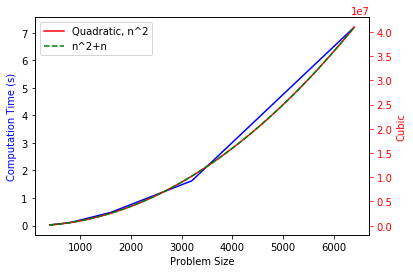

In [13]:
fig, ax1 = plt.subplots()
ax1.plot(x_li, y_li, 'b-', label='Computation Time')
ax1.set_xlabel('Problem Size')
ax1.set_ylabel('Computation Time (s)', color='b')
ax1.tick_params('s', colors='b')

ax2 = ax1.twinx()
x = np.linspace(initProblemSize, problemSize/2.0, 100) # hack
ax2.plot(x, np.array(x)*np.array(x), 'r-', label='Quadratic, n^2')
ax2.plot(x, np.array(x)*np.array(x)+np.array(x), 'g--', label='n^2+n')
ax2.set_ylabel('Cubic', color='r')
ax2.tick_params('y', colors='r')
ax2.legend()

plt.show()

In [14]:
# Try n^2 + 2*n
# How about 2^n + 4*n^2 + 5n ?

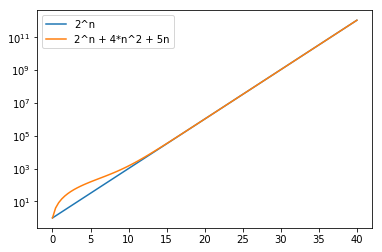

In [15]:
x = np.linspace(0.0, 40, 100)

plt.plot(x, np.power(2, x), label = '2^n')
plt.plot(x, np.power(2, x) + 4*np.power(x, 2) + 5*x, label = '2^n + 4*n^2 + 5n')
plt.yscale('log')
plt.legend()
plt.show()

## Anagram Detection

In [16]:
def anagramSolution0(str1, str2):
    mark_li = list(str2)
    
    for i in range(len(str1)):
        found = False
        for j in range(len(mark_li)):
            if str1[i] == mark_li[j]:
                mark_li[j] = None
                found = True
                break
        if not found:
            return False
    return True

In [17]:
print(anagramSolution0('abcd','dcba'))

True


To analyze this <code>anagramSolution0</code>, we need to note that each of the $n$ characters in <code>str1</code> will cause an iteration through up to $n$ characters in the list from $str2$. It is a double loop, whcih is $O(n^2)$, with conditional break. Therefore, this solution is $O(n^2)$.

In [18]:
def anagramSolution1(str1, str2):
    mark_li = list(str2)

    pos1 = 0
    stillOK = True

    while pos1 < len(str1) and stillOK:
        pos2 = 0
        found = False
        while pos2 < len(mark_li) and not found:
            if str1[pos1] == mark_li[pos2]:
                found = True
            else:
                pos2 += 1

        if found:
            mark_li[pos2] = None
        else:
            stillOK = False

        pos1 = pos1 + 1

    return stillOK

In [19]:
print(anagramSolution1('abcd','dcba'))

True


To analyze this <code>anagramSolution1</code>, we need to note that each of the $n$ characters in <code>str1</code> will cause an iteration through up to $n$ characters in the list from $str2$. Each of the $n$ positions in the list will be visited once to match a character from <code>str1</code>. The number of visits then becomes the sum of the integers from $1$ to $n$. This can be written as

$\sum_{i=1}^{n} i = \frac{n(n+1)}{2} = \frac{1}{2} n^2 + \frac{1}{2} n$

As $n$ gets large, the $n^2$ term will dominate the $n$ term and the $1/2$ can be ignored. Therefore, this solution is $O(n^2)$.

In [20]:
def anagramSolution2(str1, str2):
    li1 = list(str1)
    li2 = list(str2)

    li1.sort()
    li2.sort()

    pos = 0
    matches = True

    while pos < len(li1) and matches:
        if li1[pos] == li2[pos]:
            pos += 1
        else:
            matches = False

    return matches

In [21]:
print(anagramSolution2('abcde','edcab'))

True


At first glance you may be tempted to think that this algorithm is $O(n)$, since there is one simple iteration to compare the $n$ characters after the sorting process. However, the two calls to the Python <code>sort</code> method are not without their own cost. As we will see later, sorting is typically either $O(n^2)$ or $O(n\log{n})$, so the sorting operations dominate the iteration. In the end, this algorithm $2n^2+n$ or $2n\log{n}+n$ will have the same order of magnitude as that of the sorting process.

In [23]:
def anagramSolution3(str1, str2):
    ##  brute force 
    pass

A **brute force** technique for solving a problem typically tries to exhaust all possibilities. For the anagram detection problem, we can simply generate a list of all possible strings using the characters from <code>str1</code> and then see if <code>str2</code> occurs.

In [24]:
def anagramSolution4(str1, str2):
    c1 = [0]*26
    c2 = [0]*26
    
    for i in range(len(str1)):
        index = ord(str1[i]) - ord('a')
        c1[index] += 1
        
    for j in range(len(str2)):
        index = ord(str2[j]) - ord('a')
        c2[index] += 1
    
    print(c1)
    print(c2)
    
    for k in range(len(c1)):
        if c1[k] != c2[k]:
            return False
    
    return True

In [25]:
print(anagramSolution4('abcde','edcab'))

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True


Again, the solution has a number of iterations. However, unlike the first solution, **none of them are nested.** The first two iterations used to count the characters are both based on $n$. The third iteration, comparing the two lists of counts, always takes 26 steps since there are 26 possible characters in the strings. Adding it all up gives us $T(n)=2n+26$ steps. That is $O(n)$. We have found **a linear order of magnitude** algorithm for solving this problem.

## Performance of Python List

| Operation|Big-O Efficiency|
|----------|---------------|
|index|O(1)|
|index assignment|O(1)|
|append|O(1)|
|pop()|O(1)|
|pop(i)|O(n)|
|insert(i,item)|O(n)|
|del operator|O(n)|
|iteration|O(n)|
|contains (in)|O(n)|
|get slice|O(k)|
|del slice|O(n)|
|set slice|O(n+k)|
|reverse|O(n)|
|concatenate|O(k)|
|sort|O(n log n)|
|multiply|O(nk)|

In [26]:
# Lets take a look at pop() and pop(i)
x = 2000000
li = list(range(x))
%timeit -n 1000 li.pop()

x = 2000000
li = list(range(x))
%timeit -n 1000 li.pop(0)

122 ns ± 13.7 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.79 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [27]:
import timeit

pop = timeit.timeit('li.pop', setup = 'x = 2000000; li = list(range(x))', number = 1000)
pop0 = timeit.timeit('li.pop(0)', setup = 'x = 2000000; li = list(range(x))', number = 1000)

In [28]:
x_li = list()
pop_li = list()
pop0_li = list()

for x in range(1000, 100001, 1000):
    pop = timeit.timeit('li.pop()', setup = 'li = list(range({}))'.format(x), number = 1000)
    pop0 = timeit.timeit('li.pop(0)', setup = 'li = list(range({}))'.format(x), number = 1000)
    
    x_li.append(x)
    pop_li.append(pop)
    pop0_li.append(pop0)

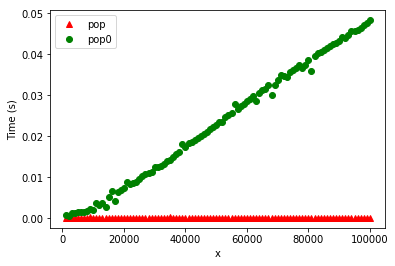

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_li, pop_li, "r^", label='pop')
plt.plot(x_li, pop0_li, "go", label='pop0')

plt.legend()
plt.xlabel('x')
plt.ylabel('Time (s)')

plt.show()

## Performance of Python Dictionary

| Operation|Big-O Efficiency|
|----------|---------------|
|copy|O(n)|
|get item|O(1)|
|set item|O(1)|
|delete item|O(1)|
|contains (in)|O(1)|
|iteration|O(n)|

For our last performance experiment we will compare the performance of the **contains** operation between **lists** and **dictionaries**. In the process we will confirm that the contains operator for lists is $O(n)$ and the contains operator for dictionaries is $O(1)$.

In [30]:
import timeit
import random

x_li = list()
list_li = list()
dict_li = list()

for i in range(1000, 100001, 1000):
    t = timeit.Timer("random.randrange({}) in x".format(i),
                     "from __main__ import random, x")
    x = list(range(i))
    lst_time = t.timeit(number=100)
    x = {j:None for j in range(i)}
    d_time = t.timeit(number=100)
    
    x_li.append(i)
    list_li.append(lst_time)
    dict_li.append(d_time)

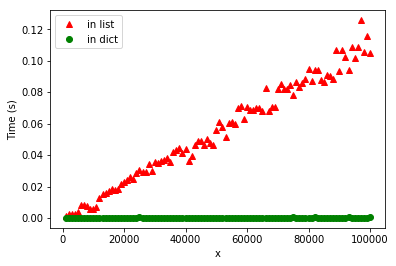

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_li, list_li, "r^", label='in list')
plt.plot(x_li, dict_li, "go", label='in dict')

plt.legend()
plt.xlabel('x')
plt.ylabel('Time (s)')

plt.show()